In [1]:
%matplotlib inline

In [2]:
import sys
# This is needed for large-ish dataset KD-tree construction. Fingers crossed that it actually works...
sys.setrecursionlimit(10000)

In [2]:
import sklearn

In [2]:
%time %run LevelJoiner.py

Done
CPU times: user 3min 25s, sys: 7.96 s, total: 3min 33s
Wall time: 3min 43s


In [ ]:
%debug

In [3]:
from matplotlib import pyplot as plt

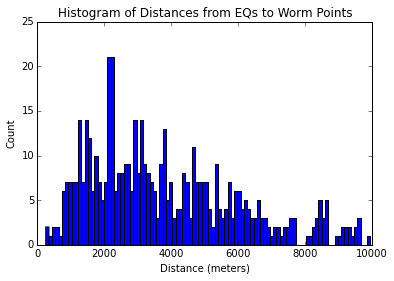

In [4]:
plt.hist(min_dist_to_nodes, bins=100, cumulative=False)
plt.xlabel('Distance (meters)')
plt.ylabel('Count')
plt.title('Histogram of Distances from EQs to Worm Points')
plt.savefig('ADK_BGA_EQDistToWormsHistogramBall.png')

In [5]:
depth_array = np.array(depth_analysis)

In [8]:
print depth_array[0:20,0]

[  4200.  10100.  10800.   6700.   7000.   7800.   6300.   6000.  10900.
  14600.   3100.  12700.   3100.  11100.    100.   6800.   7900.  12400.
   2300.  10500.]


In [5]:
depth_array = np.array(depth_analysis)

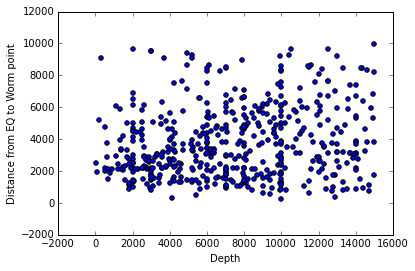

In [6]:
plt.scatter(depth_array[:,0],depth_array[:,1])
plt.xlabel("Depth")
plt.ylabel("Distance from EQ to Worm point")
plt.savefig("Worm_Depth_Analysis_BGA.png")

In [7]:
len(min_dist_to_nodes)

514

In [5]:
depths = []
for e in eq_query.all():
    dpth = e[0]._Depth_km_
    if dpth == None:
        continue
    depths += [dpth*1000.]

In [9]:
print dq

[ array([ 3088.46021119,  3103.36166245,  3282.83548825,  3514.34287406,
        3591.65883645,  3721.78947537,  3810.24331172,  3997.17224535,
        4150.63031656,  4335.75999016,  4966.85248357,  5223.80457766,
        5381.71897944,  5386.85236283,  5396.62003713,  5510.58200816,
        5875.52250805,  5972.72340828,  5983.46821701,  6059.17159805,
        6129.44150691,  6135.99769567,  6137.42375795,  6141.59483944,
        6172.88675278,  6248.1578686 ,  6282.61236951,  6311.12301179,
        6378.64506918,  6405.01867521,  6491.88229692,  6503.35146012,
        6568.82880525,  6650.18960638,  6663.35470285,  6702.97195194,
        6797.31557329,  6845.87570528,  6900.28847547,  6964.56640647,
        6967.37365919,  7058.54186782,  7067.74414852,  7081.73438524,
        7344.03651466,  7420.00271329,  7476.39407483,  7494.27695561,
        7607.62813035,  7624.18877059,  7889.68603428,  7952.77473203,
        8030.04321928,  8154.67096212,  8156.75910723,  8197.51100586,
    

In [24]:
plt.hist?

(array([ 297326.,  139277.,  134392.,  128851.,  124264.,  236572.,
         113084.,  107154.,  102699.,  204961.]),
 array([-35000., -32000., -29000., -26000., -23000., -20000., -17000.,
        -14000., -11000.,  -8000.,  -5000.]),
 <a list of 10 Patch objects>)

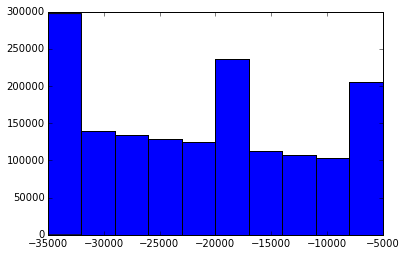

In [28]:
plt.hist(worm_pt_coords[:,2])

In [1]:
import cPickle as cp

In [4]:
output = open('closest_worm_pickled.pkl', 'wb')
cp.dump(closest_worm, output,-1)
output.close()

In [2]:
infile = open('worm_kd_ADKMergedBGA2500_points.pkl', 'rb')
worm_kd = cp.load(infile)
infile.close()

In [5]:
output = open('worm_kd_ADKMergedBGA2500_points.pkl', 'wb')
cp.dump(worm_kd, output,-1)
output.close()

In [6]:
import sys
sys.getsizeof(worm_kd)

976

In [7]:
from __future__ import print_function
from sys import getsizeof, stderr
from itertools import chain
from collections import deque
try:
    from reprlib import repr
except ImportError:
    pass

def total_size(o, handlers={}, verbose=False):
    """ Returns the approximate memory footprint an object and all of its contents.

    Automatically finds the contents of the following builtin containers and
    their subclasses:  tuple, list, deque, dict, set and frozenset.
    To search other containers, add handlers to iterate over their contents:

        handlers = {SomeContainerClass: iter,
                    OtherContainerClass: OtherContainerClass.get_elements}

    """
    dict_handler = lambda d: chain.from_iterable(d.items())
    all_handlers = {tuple: iter,
                    list: iter,
                    deque: iter,
                    dict: dict_handler,
                    set: iter,
                    frozenset: iter,
                   }
    all_handlers.update(handlers)     # user handlers take precedence
    seen = set()                      # track which object id's have already been seen
    default_size = getsizeof(0)       # estimate sizeof object without __sizeof__

    def sizeof(o):
        if id(o) in seen:       # do not double count the same object
            return 0
        seen.add(id(o))
        s = getsizeof(o, default_size)

        if verbose:
            print(s, type(o), repr(o), file=stderr)

        for typ, handler in all_handlers.items():
            if isinstance(o, typ):
                s += sum(map(sizeof, handler(o)))
                break
        return s

    return sizeof(o)


##### Example call #####

if __name__ == '__main__':
    d = dict(a=1, b=2, c=3, d=[4,5,6,7], e='a string of chars')
    print(total_size(d, verbose=True))


796


280 <type 'dict'> {'a': 1, 'c': 3, 'b': 2, 'e': 'a string of chars', 'd': [4, 5, 6, 7]}
38 <type 'str'> 'a'
24 <type 'int'> 1
38 <type 'str'> 'c'
24 <type 'int'> 3
38 <type 'str'> 'b'
24 <type 'int'> 2
38 <type 'str'> 'e'
54 <type 'str'> 'a string of chars'
38 <type 'str'> 'd'
104 <type 'list'> [4, 5, 6, 7]
24 <type 'int'> 4
24 <type 'int'> 5
24 <type 'int'> 6
24 <type 'int'> 7


In [3]:
total_size(worm_kd)

NameError: name 'total_size' is not defined

In [4]:
len(worm_kd.idx_array)

2429639